<a href="https://colab.research.google.com/github/iyeboah22/GIS-DS/blob/main/ps1(Redo).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import libraries
import os, zipfile
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from google.colab import files

from google.colab import data_table
data_table.enable_dataframe_formatter()

!pip install mapclassify
import mapclassify

In [2]:
#Read in Mental health disorder data
! wget -q -O Mental.csv  https://github.com/iyeboah22/GIS-DS/raw/main/Mental%20health%20Depression%20disorder%20Data.csv
geo_mh = pd.read_csv('Mental.csv')


<ipython-input-2-19a5e2c049af>:3: DtypeWarning: Columns (5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  geo_mh = pd.read_csv('Mental.csv')


In [3]:

#Read in country coordinates
! wget -q -O countries2.csv  https://github.com/iyeboah22/GIS-DS/raw/main/countries%202.csv #aok: there is no such data file countries_2.csv in github! you need to upload it first
geo_coord=pd.read_csv('countries2.csv')

In [4]:
#let's rename the columns to something shorter
map_names = {'Entity': 'country',
             'Code': 'code',
             'Year' : 'year',
             'Schizophrenia (%)':'schizo',
             'Bipolar disorder (%)':'bipolar',
             'Eating disorders (%)' : 'eating dis',
             'Anxiety disorders (%)' : 'anxiety',
             'Drug use disorders (%)':'drug',
             'Depression (%)':'depres',
             'Alcohol use disorders (%)':'alcohol'}

geo_mh.rename(columns=map_names,inplace=True)

geo_mh['schizo'] = pd.to_numeric(geo_mh['schizo'], errors='coerce')
geo_mh['bipolar'] = pd.to_numeric(geo_mh['bipolar'], errors='coerce')
geo_mh['eating dis'] = pd.to_numeric(geo_mh['eating dis'], errors='coerce')



geo_mh = geo_mh.drop(columns= ['index'])
print(geo_mh.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108553 entries, 0 to 108552
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   country     108553 non-null  object 
 1   code        103141 non-null  object 
 2   year        108553 non-null  object 
 3   schizo      25872 non-null   float64
 4   bipolar     19404 non-null   float64
 5   eating dis  100234 non-null  float64
 6   anxiety     6468 non-null    float64
 7   drug        6468 non-null    float64
 8   depres      6468 non-null    float64
 9   alcohol     6468 non-null    float64
dtypes: float64(7), object(3)
memory usage: 8.3+ MB
None


In [5]:
#Dropping the rows which have non-numerical data, and so we concentrate on the rows up to 6467 for now
geo_mh = geo_mh.dropna()
geo_mh

country code  year    schizo   bipolar  eating dis   anxiety  \
0     Afghanistan  AFG  1990  0.160560  0.697779    0.101855  4.828830   
1     Afghanistan  AFG  1991  0.160312  0.697961    0.099313  4.829740   
2     Afghanistan  AFG  1992  0.160135  0.698107    0.096692  4.831108   
3     Afghanistan  AFG  1993  0.160037  0.698257    0.094336  4.830864   
4     Afghanistan  AFG  1994  0.160022  0.698469    0.092439  4.829423   
...           ...  ...   ...       ...       ...         ...       ...   
6463     Zimbabwe  ZWE  2013  0.155670  0.607993    0.117248  3.090168   
6464     Zimbabwe  ZWE  2014  0.155993  0.608610    0.118073  3.093964   
6465     Zimbabwe  ZWE  2015  0.156465  0.609363    0.119470  3.098687   
6466     Zimbabwe  ZWE  2016  0.157111  0.610234    0.121456  3.104294   
6467     Zimbabwe  ZWE  2017  0.157963  0.611242    0.124443  3.110926   

          drug    depres   alcohol  
0     1.677082  4.071831  0.672404  
1     1.684746  4.079531  0.671768  
2     1.694334  4.088358  0.670644  
3     1.705320  4.096190  0.669738  
4     1.716069  4.099582  0.669260  
...        ...       ...       ...  
6463  0.766280  3.128192  1.515641  
6464  0.768914  3.140290  1.515470  
6465  0.771802  3.155710  1.514751  
6466  0.772275  3.174134  1.513269  
6467  0.772648  3.192789  1.510943  

[5488 rows x 10 columns]

In [6]:
print(geo_coord.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    244 non-null    object 
 1   latitude   244 non-null    float64
 2   longitude  244 non-null    float64
 3   name       245 non-null    object 
dtypes: float64(2), object(2)
memory usage: 7.8+ KB
None


In [7]:
#Using lat and long to get geo points
geo_coord = gpd.GeoDataFrame(geo_coord, geometry=gpd.points_from_xy(geo_coord.latitude, geo_coord.longitude))
geo_coord.head()

country   latitude  longitude                  name  \
0      AD  42.546245   1.601554               Andorra   
1      AE  23.424076  53.847818  United Arab Emirates   
2      AF  33.939110  67.709953           Afghanistan   
3      AG  17.060816 -61.796428   Antigua and Barbuda   
4      AI  18.220554 -63.068615              Anguilla   

                     geometry  
0    POINT (42.54624 1.60155)  
1   POINT (23.42408 53.84782)  
2   POINT (33.93911 67.70995)  
3  POINT (17.06082 -61.79643)  
4  POINT (18.22055 -63.06862)

In [8]:
geo_mh.rename(columns = {'country':'name'}, inplace = True)
geo_mh.head()


name code  year    schizo   bipolar  eating dis   anxiety      drug  \
0  Afghanistan  AFG  1990  0.160560  0.697779    0.101855  4.828830  1.677082   
1  Afghanistan  AFG  1991  0.160312  0.697961    0.099313  4.829740  1.684746   
2  Afghanistan  AFG  1992  0.160135  0.698107    0.096692  4.831108  1.694334   
3  Afghanistan  AFG  1993  0.160037  0.698257    0.094336  4.830864  1.705320   
4  Afghanistan  AFG  1994  0.160022  0.698469    0.092439  4.829423  1.716069   

     depres   alcohol  
0  4.071831  0.672404  
1  4.079531  0.671768  
2  4.088358  0.670644  
3  4.096190  0.669738  
4  4.099582  0.669260

In [ ]:
#aok: Nooo! just retain one year; or groupby and agg to collapse to summary stats such as sum or mean
#ie: match 1:1, not 1:m; you have unique country in shapefile; but multiples in dataset!

In [9]:
geo_mh=geo_mh[geo_mh['year']=='1990']

In [10]:
geo_mh = geo_mh.merge(geo_coord, on='name',how='outer',indicator=True)  #id name it sth new and different: geo_mh was simple dataset, now its merged and deserves a new name

geo_mh #aok then sort on merge by clicking column header for it, and browse nonmerges
#indeed multiple mistakes! eg congo, cote de ivore etc etc
#ideally should fix it; can say that for simplicity just dropping nonmerges
#but at the very minimum have to be aware of mistakes and note it!!!

name code  year    schizo   bipolar  eating dis  \
0               Afghanistan  AFG  1990  0.160560  0.697779    0.101855   
1                   Albania  ALB  1990  0.193413  0.695013    0.130782   
2                   Algeria  DZA  1990  0.193582  0.802893    0.189024   
3            American Samoa  ASM  1990  0.252311  0.464999    0.187677   
4                   Andorra  AND  1990  0.266166  0.964597    0.585917   
..                      ...  ...   ...       ...       ...         ...   
252  British Virgin Islands  NaN   NaN       NaN       NaN         NaN   
253     U.S. Virgin Islands  NaN   NaN       NaN       NaN         NaN   
254       Wallis and Futuna  NaN   NaN       NaN       NaN         NaN   
255                  Kosovo  NaN   NaN       NaN       NaN         NaN   
256                 Mayotte  NaN   NaN       NaN       NaN         NaN   

      anxiety      drug    depres   alcohol country   latitude   longitude  \
0    4.828830  1.677082  4.071831  0.672404      AF  33.939110   67.709953   
1    3.327587  0.497616  2.139903  1.709465      AL  41.153332   20.168331   
2    4.976553  1.300832  3.732597  0.644399      DZ  28.033886    1.659626   
3    3.255955  0.745011  2.944230  1.153825      AS -14.270972 -170.132217   
4    5.242673  0.851843  3.768135  1.187786      AD  42.546245    1.601554   
..        ...       ...       ...       ...     ...        ...         ...   
252       NaN       NaN       NaN       NaN      VG  18.420695  -64.639968   
253       NaN       NaN       NaN       NaN      VI  18.335765  -64.896335   
254       NaN       NaN       NaN       NaN      WF -13.768752 -177.156097   
255       NaN       NaN       NaN       NaN      XK  42.602636   20.902977   
256       NaN       NaN       NaN       NaN      YT -12.827500   45.166244   

                     geometry      _merge  
0       POINT (33.939 67.710)        both  
1       POINT (41.153 20.168)        both  
2        POINT (28.034 1.660)        both  
3    POINT (-14.271 -170.132)        both  
4        POINT (42.546 1.602)        both  
..                        ...         ...  
252    POINT (18.421 -64.640)  right_only  
253    POINT (18.336 -64.896)  right_only  
254  POINT (-13.769 -177.156)  right_only  
255     POINT (42.603 20.903)  right_only  
256    POINT (-12.828 45.166)  right_only  

[257 rows x 15 columns]

In [11]:
geo_mh.rename(columns = {'country':'ISO'}, inplace = True)
geo_mh.rename(columns = {'name':'COUNTRY'}, inplace = True)
geo_mh.head()

COUNTRY code  year    schizo   bipolar  eating dis   anxiety  \
0     Afghanistan  AFG  1990  0.160560  0.697779    0.101855  4.828830   
1         Albania  ALB  1990  0.193413  0.695013    0.130782  3.327587   
2         Algeria  DZA  1990  0.193582  0.802893    0.189024  4.976553   
3  American Samoa  ASM  1990  0.252311  0.464999    0.187677  3.255955   
4         Andorra  AND  1990  0.266166  0.964597    0.585917  5.242673   

       drug    depres   alcohol ISO   latitude   longitude  \
0  1.677082  4.071831  0.672404  AF  33.939110   67.709953   
1  0.497616  2.139903  1.709465  AL  41.153332   20.168331   
2  1.300832  3.732597  0.644399  DZ  28.033886    1.659626   
3  0.745011  2.944230  1.153825  AS -14.270972 -170.132217   
4  0.851843  3.768135  1.187786  AD  42.546245    1.601554   

                   geometry _merge  
0     POINT (33.939 67.710)   both  
1     POINT (41.153 20.168)   both  
2      POINT (28.034 1.660)   both  
3  POINT (-14.271 -170.132)   both  
4      POINT (42.546 1.602)   both

In [ ]:
#Have a quick look at the data through the years for one country
#usa = geo_mh[geo_mh['code'] == 'USA']
#na = usa.dropna()
#na.head()

In [ ]:
#aok comment out everything or none

# create list of countries for North America to extract these into a separate dataframe
#country_na = ['United States','Mexico', 'Greenland','Canada',
                  'Cuba','Jamaica',
                  'Panama','Haiti',
                  'Puerto Rico','Costa Rica',
                  'Dominican Republic','Guatemala',
                  'Honduras','Belize',
                  'The Bahamas...','Nicaragua',
                  'Martinique','Sint Maarten','Turks and Caicos Islands',
                  'Grenada','Saint Kitts and Nevis','Cayman Islands',
                  'United States Minor Outlying Islands','Antigua Barbuda','Anguilla',
                  'Dominica','Saint Lucia','Saint Vincet and the Grenadines',
                  'British Virgins Islands','Saint Pierre and Miquelon','United States Virgin Islands',
                  'Saint Barthelemy','Momtserrat','Saint Martin']

IndentationError: ignored

In [ ]:
#na = geo_mh[geo_mh['name'].isin(country_na)]

#print(usa)
#na.head(500)

In [12]:
! wget -q -O world.zip https://github.com/iyeboah22/GIS-DS/raw/main/World_Countries_Generalized.zip

zip_ref = zipfile.ZipFile('world.zip', 'r');
zip_ref.extractall();
zip_ref.close();

world_map = gpd.read_file('World_Countries_Generalized/World_Countries_Generalized.shp')

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   FID         251 non-null    int64   
 1   COUNTRY     251 non-null    object  
 2   ISO         251 non-null    object  
 3   COUNTRYAFF  250 non-null    object  
 4   AFF_ISO     250 non-null    object  
 5   SHAPE_Leng  251 non-null    float64 
 6   SHAPE_Area  251 non-null    float64 
 7   geometry    251 non-null    geometry
dtypes: float64(2), geometry(1), int64(1), object(4)
memory usage: 15.8+ KB


<Axes: >

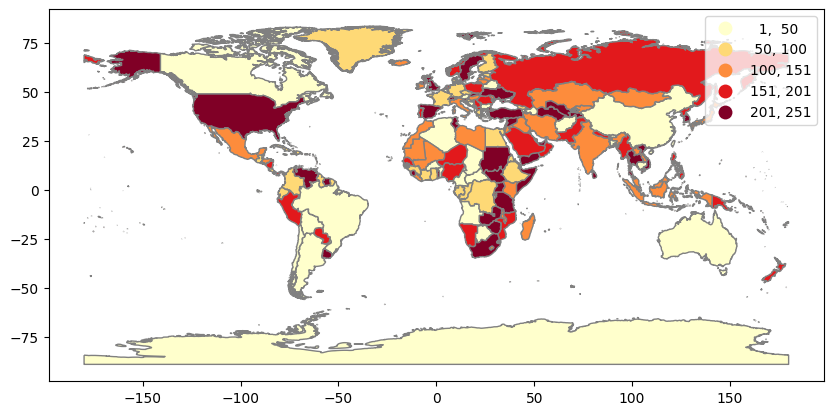

In [13]:
world_map.info()
#world_map.plot()
#aok need title and or caption
world_map.plot(figsize=(10,12),column='FID',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=5,
         edgecolor='grey',linewidth=1,legend_kwds= {"fmt": "{:,.0f}"}) #,ax=ax

In [14]:
world_map1 = pd.merge(world_map,geo_mh, on='COUNTRY') #aok just flipped vars here and that solves nonmapping problem :)

world_map1 = world_map1.drop("ISO_y",axis=1)
world_map1 = world_map1.drop("geometry_y",axis=1)

world_map1.rename(columns = {'ISO_x':'ISO'}, inplace = True)
world_map1.rename(columns = {'geometry_x':'geometry'}, inplace = True)



world_map1.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 222 entries, 0 to 221
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   FID         222 non-null    int64   
 1   COUNTRY     222 non-null    object  
 2   ISO         222 non-null    object  
 3   COUNTRYAFF  221 non-null    object  
 4   AFF_ISO     221 non-null    object  
 5   SHAPE_Leng  222 non-null    float64 
 6   SHAPE_Area  222 non-null    float64 
 7   geometry    222 non-null    geometry
 8   code        182 non-null    object  
 9   year        182 non-null    object  
 10  schizo      182 non-null    float64 
 11  bipolar     182 non-null    float64 
 12  eating dis  182 non-null    float64 
 13  anxiety     182 non-null    float64 
 14  drug        182 non-null    float64 
 15  depres      182 non-null    float64 
 16  alcohol     182 non-null    float64 
 17  latitude    218 non-null    float64 
 18  longitude   218 non-null    float64 
 19  

In [15]:
world_map1 = world_map1.dropna()
world_map1 = world_map1.astype({"schizo":'int64', "bipolar":'int64', "eating dis":'int64', "anxiety":'int64',
                                 "drug":'int64', "depres":'int64', "depres":'int64', "alcohol":'int64'})
world_map1.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 178 entries, 0 to 221
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   FID         178 non-null    int64   
 1   COUNTRY     178 non-null    object  
 2   ISO         178 non-null    object  
 3   COUNTRYAFF  178 non-null    object  
 4   AFF_ISO     178 non-null    object  
 5   SHAPE_Leng  178 non-null    float64 
 6   SHAPE_Area  178 non-null    float64 
 7   geometry    178 non-null    geometry
 8   code        178 non-null    object  
 9   year        178 non-null    object  
 10  schizo      178 non-null    int64   
 11  bipolar     178 non-null    int64   
 12  eating dis  178 non-null    int64   
 13  anxiety     178 non-null    int64   
 14  drug        178 non-null    int64   
 15  depres      178 non-null    int64   
 16  alcohol     178 non-null    int64   
 17  latitude    178 non-null    float64 
 18  longitude   178 non-null    float64 
 19  

<Axes: >

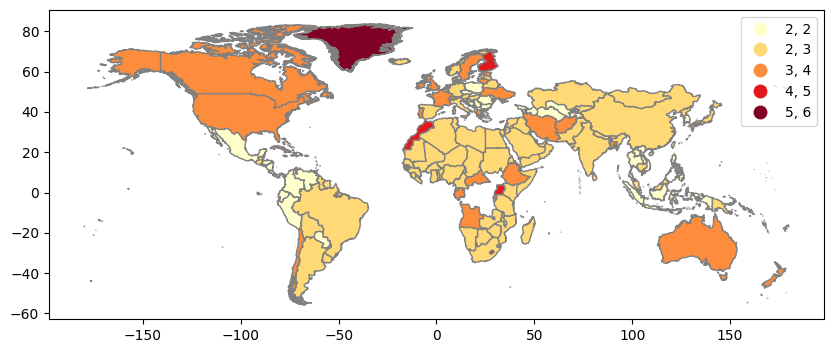

In [18]:
world_map1.plot(figsize=(10,12),column='depres',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=5,
         edgecolor='grey',linewidth=1,legend_kwds= {"fmt": "{:,.0f}"})

/usr/local/lib/python3.10/dist-packages/mapclassify/classifiers.py:686: UserWarning: Not enough unique values in array to form 5 classes. Setting k to 3.
  self._classify()


<Axes: >

Text(0.5, 1.0, 'test')

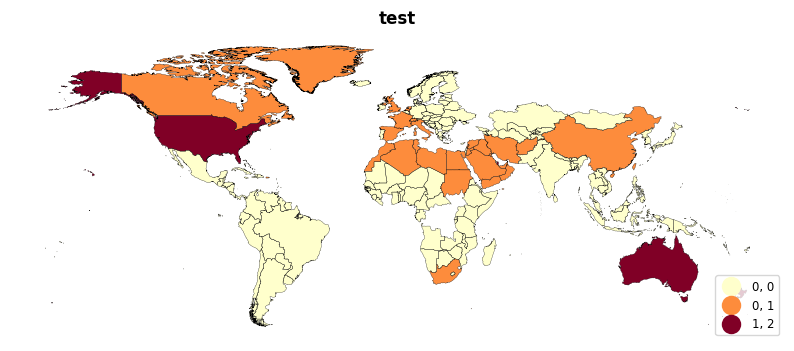

In [19]:
ax = world_map1.boundary.plot(edgecolor='black', linewidth=0.2, figsize=(10, 5))
world_map1.plot(ax=ax, column='drug', legend=True, cmap='YlOrRd', scheme='natural_breaks', k=5, legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4})

ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

for edge in ['right', 'bottom', 'top', 'left']:
    ax.spines[edge].set_visible(False)

ax.set_title('test', size=12, weight='bold')
